In [118]:
from src.smth2matrix.shift2zero import shift2zero
import numpy as np
from math import ceil, floor

def line(p1, p2):
    A = (p1[1] - p2[1])
    B = (p2[0] - p1[0])
    C = (p1[0]*p2[1] - p2[0]*p1[1])
    return A, B, -C

def intersection(points1, points2):
    L1 = line(points1[0], points1[1])
    L2 = line(points2[0], points2[1])
    D  = L1[0] * L2[1] - L1[1] * L2[0]
    Dx = L1[2] * L2[1] - L1[1] * L2[2]
    Dy = L1[0] * L2[2] - L1[2] * L2[0]
    if D != 0:
        x = Dx / D
        y = Dy / D
        return x,y
    else:
        return False

In [119]:
from copy import copy

h = 0.4
# points = np.array([[0.3, 3], [1, 0], [2.1, 0], [3, 3.7]])

# points = np.array([[1.8 ,2.7],
#  [1.6 ,2.8],
#  # [1.69276116 ,2.40918685],
#  [0.97614341, 2.27911778],
#  [1.18717325, 1.35598215],
#  [0.         ,0.91673339],
#  [0.62090266, 0.2566332 ],
#  [1.56841545, 0.79986711],
#  [1.99697896, 0.        ],
#  [1.80357704, 1.01107135],
#  [2., 1.3],
#  # [1.80357704, 0.9],
#  # [2.4401742,  1.01461923],
#  [2.84740494, 1.65159917],
#  [2., 2.2]])

# points = np.array([
#  [1.99697896, 0.        ],
#  [1.80357704, 1.01107135],
#  [2., 1.3],
#  # [1.80357704, 0.9],
#  # [2.4401742,  1.01461923],
#  [2.84740494, 1.65159917],
#  [2., 2.2],
# [1.8 ,2.7],
#  [1.6 ,2.8],
#  # [1.69276116 ,2.40918685],
#  [0.97614341, 2.27911778],
#  [1.18717325, 1.35598215],
#  [0.         ,0.91673339],
#  [0.62090266, 0.2566332 ],
#  [1.56841545, 0.79986711]])

# points = np.array(
#     [[1.16442823, 1.46727502],
#  [0.,        1.17510501],
#  [0.90077176, 0.6740165 ],
#  [1.33001868, 0.44479351],
#  [1.91851084, 0.        ],
#  [1.94288971, 0.89913787],
#  [3.0009717,  1.12120661],
#  [2.32237597, 1.64758519],
#  [1.87844576, 1.93375824],
#  [1.23398798, 2.36786653]]
# )
points = np.array(
[[7.51704121, 0.        ],
 [9.51225862, 0.65143002],
 [9.51091533, 1.81777592],
 [8.40469702, 1.88897237]])

# points = np.array([[1.90100762, 0.47155354],
#  [1.76649848, 1.17439243],
#  [1.0961219,  1.29424416],
#  [0.82402157, 1.57594359],
#  [0.5651551,  1.27118921],
#  [0.51015571, 1.01069367],
#  [0.,       0.38886588],
#  [0.71508271, 0.45066823],
#  [1.31448442, 0.        ]])

# points = np.array([[0.03145451, 0.49118414],
#  [0.04033681, 0.25536625],
#  [0.,        0.00952259],
#  [0.2421943,  0.        ],
#  [0.34014688, 0.16533801],
#  [0.5874991,  0.12259068],
#  [0.4587838,  0.30200153],
#  [0.43832024, 0.45815434],
#  [0.26090668, 0.55609686]])

shift2zero(points)

n_x1 = 0
n_y1 = 0
for point in points:
    if point[0] > n_x1:
        n_x1 = copy(point[0])
    if point[1] > n_y1:
        n_y1 = copy(point[1])
n_x = ceil(n_x1 / h)
n_y = ceil(n_y1 / h)

lines = []
for _ in range(n_y+1):
    lines.append([])
print(lines)

[[], [], [], [], [], []]


In [120]:
for k in range(0, n_y+1):
    start = None
    end = None
    intersection_start = None
    intersection_end = None
    counter = 0
    i0 = 0
    while i0 < points.shape[0]:
        # if i < points.shape[0]:
        #     i0 = i
        # else:
        #     i0 = points.shape[0] - i
        if i0 == points.shape[0]-1:
            i1 = 0
        else:
            i1 = (i0 + 1)
        if i0 == 0:
            i2 = points.shape[0]-1
        else:
            i2 = (i0 - 1)

        #вершина лежит на линии
        if points[i0][1] == k*h:
            if points[i2][1] < k*h and points[i1][1] < k*h:
                lines[k].append([points[i0][0], points[i0][0]])
            elif points[i2][1] > k*h and points[i1][1] > k*h:
                lines[k].append([points[i0][0], points[i0][0]])
            else:
                if start is None:
                    start = copy(points[i0][0])
                else:
                    end = copy(points[i0][0])

        #ребро пересекает линию
        elif points[i0][1] < k*h < points[i1][1] or points[i1][1] < k*h < points[i0][1]:
            intersection_point = intersection([points[i0], points[i1]], [[0, k*h], [n_x, k*h]])[0]
            if start is None:
                start = copy(intersection_point)
            else:
                end = copy(intersection_point)
        if k == 5:
            print('start:', start, 'end:', end)

        if end is not None:
            lines[k].append([start, end])
            start = None
            end = None
        i0 += 1

print(lines)

start: None end: None
start: None end: None
start: None end: None
start: None end: None
[[[0.0, 0.0]], [[1.2251307730644652, 0.18796586421219066]], [[1.9950463007532202, 0.37593172842438133]], [[1.9945856175202268, 0.5638975926365721]], [[1.9941249342872336, 0.7518634568487627]], []]


In [121]:
k_prev = 0
k_next = 0
point_prev = None
point_next = None
for k in range(0, n_y+1):
    min = n_x1
    max = 0
    i0 = 0
    while i0 < 2*len(points):
        if i0 < len(points):
            i = i0
        else:
            i = len(points) - i0
        # if i == len(points):
        #     i = -1
        if i == points.shape[0]-1:
            i_next = 0
        else:
            i_next = (i + 1)
        if i == 0:
            i_prev = points.shape[0]-1
        else:
            i_prev = (i - 1)
        if (k+1)*h >= points[i][1] > k*h >= points[i_prev][1] or k*h < points[i][1] <= (k + 1)*h <= points[i_prev][1]:
            # print('case1', points[i], k)
            if points[i_prev][1] <= k*h:
                k_prev = -1
                k_next = 0
                intersection_point = intersection([points[i_prev], points[i]], [[0, k*h], [n_x, k*h]])[0]
                point_prev = copy(intersection_point)
                point_next = None
                if max < points[i][0]:
                    max = copy(points[i][0])
                if min > points[i][0]:
                    min = copy(points[i][0])
            elif points[i_prev][1] >= (k+1)*h:
                k_prev = 1
                k_next = 0
                intersection_point = intersection([points[i_prev], points[i]], [[0, (k+1)*h], [n_x, (k+1)*h]])[0]
                point_prev = copy(intersection_point)
                point_next = None
                if max < points[i][0]:
                    max = copy(points[i][0])
                if min > points[i][0]:
                    min = copy(points[i][0])
        elif points[i][1] <= k*h < points[i_prev][1] <= (k + 1)*h or k*h < points[i_prev][1] <= (k + 1)*h and points[i][1] >= (k+1)*h:
            # print('case2', points[i], k)
            if points[i][1] <= k*h:
                k_next = -1
                intersection_point = intersection([points[i_prev], points[i]], [[0, k*h], [n_x, k*h]])[0]
                point_next = copy(intersection_point)
            elif points[i][1] >= (k+1)*h:
                k_next = 1
                intersection_point = intersection([points[i_prev], points[i]], [[0, (k + 1)*h], [n_x, (k + 1)*h]])[0]
                point_next= copy(intersection_point)
        elif k*h < points[i][1] <= (k + 1)*h and k*h < points[i_prev][1] <= (k + 1)*h:
            if max < points[i][0]:
                max = copy(points[i][0])
            if min > points[i][0]:
                min = copy(points[i][0])
            i0+=1
            continue
        if k_prev * k_next != 0:
            if k_prev * k_next == 1 and not (i==0 and i0==0):
                if k_prev == -1:
                    print('Здесь', [min, max], i, i0, k)
                    k_prev = 0
                    k_next = 0
                    lines[k+1].append([min,max])
                    if min < point_prev and min < point_next:
                        if point_prev < point_next:
                            lines[k].append([min,point_prev])
                        elif point_next < point_prev:
                            lines[k].append([min,point_next])
                    if max > point_prev and max > point_next:
                        if point_prev > point_next:
                            lines[k].append([point_prev, max])
                        elif point_next > point_prev:
                            lines[k].append([point_next, max])
                    min = n_x1
                    max = 0
                if k_prev == 1:
                    k_prev = 0
                    k_next = 0
                    lines[k].append([min, max])
                    if min < point_prev and min < point_next:
                        if point_prev < point_next:
                            lines[k+1].append([min,point_prev])
                        elif point_next < point_prev:
                            lines[k+1].append([min,point_next])
                    if max > point_prev and max > point_next:
                        if point_prev > point_next:
                            lines[k+1].append([point_prev, max])
                        elif point_next > point_prev:
                            lines[k+1].append([point_next, max])
                    min = n_x1
                    max = 0
            elif k_prev * k_next == -1:
                if k_prev == -1:
                    if min < point_prev:
                        lines[k].append([min, point_prev])
                    if max > point_prev:
                        lines[k].append([point_prev, max])
                    if min < point_next:
                        lines[k+1].append([min, point_next])
                    if max > point_next:
                        lines[k+1].append([point_next, max])
                    k_prev = 0
                    k_next = 0
                    min = n_x1
                    max = 0
                elif k_prev == 1:
                    # print('case1', [min, max], [point_prev, point_next])
                    if min < point_prev:
                        # print('1', [min, point_prev])
                        lines[k+1].append([min, point_prev])
                    if max > point_prev:
                        # print('2',[point_prev, max])
                        lines[k+1].append([point_prev, max])
                    if min < point_next:
                        # print('3',[min, point_next])
                        lines[k].append([min, point_next])
                    if max > point_next:
                        # print('4',[point_next, max])
                        lines[k].append([point_next, max])
                    k_prev = 0
                    k_next = 0
                    min = n_x1
                    max = 0
            k_prev = 0
            k_next = 0
        i0+=1



Здесь [0.88765581, 1.9938741199999992] 0 4 4


In [122]:
for line in lines:
    print(line)

[[0.0, 0.0]]
[[1.2251307730644652, 0.18796586421219066], [1.2251307730644652, 1.9952174100000004]]
[[1.9950463007532202, 0.37593172842438133], [1.9950463007532202, 1.9952174100000004]]
[[1.9945856175202268, 0.5638975926365721]]
[[1.9941249342872336, 0.7518634568487627]]
[[0.88765581, 1.9938741199999992]]


In [123]:
# from copy import copy
#
# # для всех прямых:
# for i in range(len(lines) - 2):
#     for j in range(len(lines[i])):
#         segment = lines[i][j]
#         stop = False
#         j = 0
#         while j <= len(lines[i+1]) - 1 and not stop:
#             if j == len(lines[i+1]) - 1 and lines[i+1][j][1] < segment[0]:
#                 if len(lines[i]) - 1 == 0 or lines[i][j-1][1] < lines[i+1][j][1]:
#                     print(i)
#                     lines[i+1][j][1] = copy(segment[0])
#                     stop = True
#             elif lines[i+1][j][1] < segment[0] < lines[i+1][j + 1][0] and lines[i+1][j][1] < segment[1] < lines[i+1][j + 1][0]:
#                 lines[i+1][j][1] = copy(segment[0])
#                 stop = True
#             j+=1
# # для последней прямой:
# i = len(lines)
# for segment in lines[i - 1]:
#     stop = False
#     j = 0
#     while j < len(lines[i-2]) and not stop:
#         if j != len(lines[i-2]) - 1:
#             if lines[i-2][j][1] < segment[0] < lines[i-2][j + 1][0] and lines[i-2][j][1] < segment[1] < lines[i-2][j + 1][0]:
#                 lines[i-2][j][1] = copy(segment[0])
#                 stop = True
#         elif lines[i-2][j][1] < segment[0]:
#                 lines[i-2][j][1] = copy(segment[0])
#                 stop = True
#         j += 1

In [124]:
def first_elem(e):
  return e[0]

for line in lines:
    for segment in line:
        segment.sort()
    line.sort(key=first_elem)
    i = 0
    while i < (len(line) - 1):
        if line[i][1] == line[i+1][0]:
            line[i][1] = line[i+1][1]
            line.pop(i+1)
            continue
        if line[i][1] > line[i+1][0]:
            if line[i][1] < line[i+1][1]:
                line[i][1] = line[i+1][1]
                line.pop(i+1)
                continue
        if line[i][1] > line[i+1][0]:
            if line[i][1] >= line[i+1][1]:
                line.pop(i+1)
                continue
        i+=1
    # print('done',line)


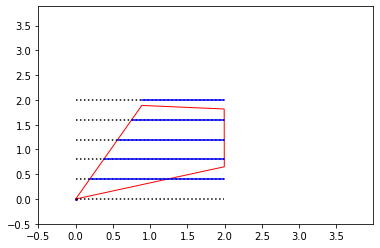

In [125]:

from matplotlib import pyplot as plt, patches

pallet_width = n_x1
pallet_height = n_y1

fig, ax = plt.subplots()

ax.set_xlim(-0.5, pallet_width + 2)
ax.set_ylim(-0.5, pallet_height + 2)

for i in range(len(lines)):
    plt.plot([0, pallet_width], [i*h, i*h], color = 'black', linestyle=':')

figure = patches.Polygon(points,
                            linewidth=1,
                            edgecolor='red',
                            fill=False)
ax.add_patch(figure)

for i in range(len(lines)):
    for sigment in lines[i]:
        if sigment[0] != sigment[1]:
            plt.plot(sigment, [i*h, i*h], color = 'blue')
        else:
            ax.scatter(sigment[0], i*h, color = 'blue', s = 4)

plt.savefig('sigments.png')